# K Nearest Neighbors - Data and Model

În partea anterioară am aflat noțiuni teoretice despre modelul de clasificare KNN. În cadrul acestui tutorial o să punem în aplicare acele practici. O să începem cu partea de vizualizare de date după care o să creem un model simplu în care valoarea pentru acel K o să fie 1.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Fișierul cu care o să lucrăm poartă denumirea de gene_expression.csv. În cadrul acelui fișier csv sunt două features care poartă denumirea de Gene One și Gene Two ce reprezintă două valori integer care fac referire la două gene ale unei persoane. Aceste valori ale genelor indică dacă persoana respectivă are cancer sau nu.

In [5]:
df = pd.read_csv('../data/DATA/gene_expression.csv')

In [6]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

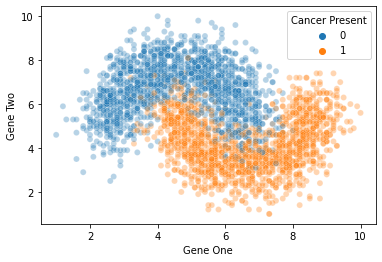

In [7]:
sns.scatterplot(x='Gene One', y='Gene Two', data=df, hue='Cancer Present', alpha=0.32)

Din scatterplot-ul de mai sus se poate observa faptul că există o separare destul de clară între clasa 0 și clasa 1 din cadrul coloanei 'Cancer Present' (coloană care specifică dacă o persoană are sau nu are cancer)

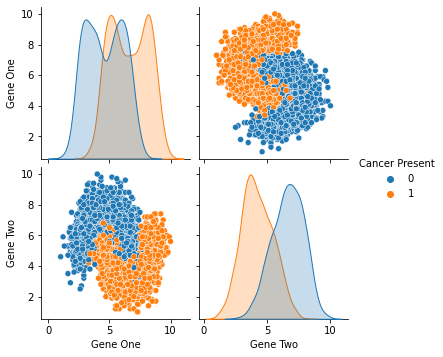

In [8]:
sns.pairplot(data=df, hue='Cancer Present')

Mai multe vizualizări nu prea are rost să facem pentru setul de date pe care îl avem. Evident aici intră în discuție și partea de domain knowledge, aici există posibilitatea să luăm legătura cu un biolog și să vedem ce anume reprezintă acele valori pentru Gene One și Gene Two și să ne dea alte informații sau detalii ajutătoare. Urmează însă partea în care trebuie să facem train_test_split la date. După cum spuneam, pentru un algoritm de KNN, tot timpul trebuie să scalăm datele cu care lucrăm.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X_train)

StandardScaler()

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

După ce am împărțit datele în train și test sets și le-am scalat, putem să ne creem modelul respectiv. Pentru a crea un model de KNN (K Nearest Neighbors), acesta se importă din sklearn.neighbors. Există trei modele de K Neighbors, și anume KNeighborsClassifier, KNeighborsRegressor și KNeighborsTransformer. Pentru cazul de față cel mai potrivit este modelul de clasificare deoarece dorim să clasificăm dacă o anumită persoană în funcție de valorile de la Gene One și Gene Two are cancer sau nu.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

Ca de fiecar dată, dacă lucrăm cu un model nou ar fi recomandat să utilizăm metoda help pentru modelul respectiv pentru a vedea ce fel de parametrii are acest model.

In [17]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

Dintre parametrii de mai sus cel mai important este cel de n_neighbors, care defapt reprezintă acel K despre care am vorbit în partea teoretică. Mai există și parametrul de weight în care putem să spunem dacă un anumit feature este mai important decât altul, sau parametrul de algorithm care decide ce fel de algoritm să se folosească pentru a calcula distanța dintre puncte. De cele mai multe ori este indicat să folosim ceea ce este default, singurul lucru de care ar trebuie să fin ocupați pentru moment este parametrul de n_neighbors. O să începem cu cel mai simplu model de KNN, și anume acela în care valoarea pentru n_neighbors este 1

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=1)

După ce am creat modelul respectiv putem să îl antrenăm pe datele scalate.

In [20]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Pașii următori care trebuie făcuți sunt să facem un set de predicții și să verificăm calitatea acestui model (Fiind un model de clasificare o să ne folosim de metricii de calsificare).

In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [23]:
confusion_matrix(y_test, y_pred)

array([[379,  44],
       [ 35, 442]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


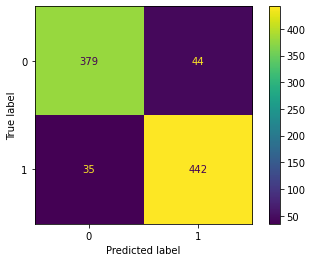

In [27]:
plot_confusion_matrix(knn_model, X_test, y_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.91      0.93      0.92       477

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



Deși pentru acest model avem un rezultat destul de bun (90% pentru accuracy, precision și recall) s-a luat în considerare doar 1 vecin pentru a face această calsificare. Întrebarea este de unde putem să ne dăm seama care este numărul potrivit de neighbors (vecini) pe care să îi luăm în considerare atunci când creem un asemenea model. Pentru a găsi valoarea optimă putem să utilizăm fie cross validation fie elbow method, ceea ce o să facem în partea următoare a acestei secțiuni

## Recapitulare

În cadrul acestei părți din sesiunea de KNN am aflat următoarele lucruri:

    1. De unde să importăm modelul de K-Neareast Neighbors

        from sklearn.neighbors import KNeighborsClassifier

    2. Cum să creem un model de KNN

        knn_model = KNeighborsClassifier(n_neighbors=1)

    3. Partea de antrenare, predicție și de verificare a performanței modelului sunt realizate ca și la oricare alt model

        knn_model.fit(X_train, y_train)

        y_pred = knn_model.predict(X_test)

        from sklearn.metrics import classification_report, confusion_matrix

        confusion_matrix(y_test, y_pred)

        print(classification_report(y_test, y_pred))